# SVM 모델
### (1) 코드 사용 예시
1. SVC(kernel="linear", C=1)과 같이 SVC모델을 사용할 수 있습니다. 하지만 큰 데이터에서는 속도가 느려권장하지 않습니다. 
2. SGDClassifier(loss="hinge", alpha=1/(m*c))와 같이 SGDClassifier 모델을 사용하는 것 입니다. 속도가 많이 빠르진 않지만 데이터가 크고 특성이 많아서 메모리에 적재시켜줄 수 없을 때 이용하면 좋습니다. 
3. LinearSVC(C=1 ,loss="hinge")


출처: [후니의 컴퓨터](https://hoony-gunputer.tistory.com/142)


👉 가장 기본적인 ' SVC(kernel="linear", C=1)' 형태의 코드를 사용하였음. 하지만 설명과 같이 큰 데이터에서는 추천하지 않는 방식이라고 함.   
👉 'SGDClassifier(loss="hinge", alpha=1/(m*c))' 에 대한 모델 구현 방식도 공부 필요

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno

In [16]:
df = pd.read_csv('/content/drive/MyDrive/슬기로운 건강생활/data/health_data_01.csv', encoding='utf-8')
df

,성별,나이,bmi,비만여부,혈색소,빈혈여부,식전혈당(공복혈당),당뇨여부,(혈청지오티)AST,AST구분,(혈청지오티)ALT,ALT구분,AST/ALT비율,감마 지티피,GTP/ALT비율,음주여부,간 수치
0,0,40,22.0,0,15.0,0,90.0,0,21.0,0,27.0,0,0.777778,21.0,0.777778,0.0,0
1,1,60,28.9,1,12.7,1,87.0,0,18.0,0,15.0,0,1.200000,15.0,1.000000,0.0,0
2,1,50,22.9,0,12.8,1,102.0,1,27.0,0,25.0,0,1.080000,7.0,0.280000,0.0,0
3,0,60,27.3,1,16.4,0,146.0,1,65.0,1,97.0,1,0.670103,72.0,0.742268,0.0,0
4,1,50,20.8,0,12.4,1,110.0,1,18.0,0,17.0,0,1.058824,14.0,0.823529,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987327,1,60,26.2,1,13.6,0,124.0,1,21.0,0,25.0,0,0.840000,18.0,0.720000,0.0,0
987328,1,50,21.5,0,14.0,0,98.0,0,21.0,0,14.0,0,1.500000,19.0,1.357143,1.0,0
987329,0,40,22.9,0,16.0,0,83.0,0,26.0,0,20.0,0,1.300000,17.0,0.850000,1.0,0
987330,1,40,27.3,1,11.9,1,111.0,1,25.0,0,29.0,0,0.862069,13.0,0.448276,0.0,0


In [17]:
# train_a = train.truncate(after='100',axis=0)

train = df.drop(labels=range(100000, 987332), axis=0)

train

,성별,나이,bmi,비만여부,혈색소,빈혈여부,식전혈당(공복혈당),당뇨여부,(혈청지오티)AST,AST구분,(혈청지오티)ALT,ALT구분,AST/ALT비율,감마 지티피,GTP/ALT비율,음주여부,간 수치
0,0,40,22.0,0,15.0,0,90.0,0,21.0,0,27.0,0,0.777778,21.0,0.777778,0.0,0
1,1,60,28.9,1,12.7,1,87.0,0,18.0,0,15.0,0,1.200000,15.0,1.000000,0.0,0
2,1,50,22.9,0,12.8,1,102.0,1,27.0,0,25.0,0,1.080000,7.0,0.280000,0.0,0
3,0,60,27.3,1,16.4,0,146.0,1,65.0,1,97.0,1,0.670103,72.0,0.742268,0.0,0
4,1,50,20.8,0,12.4,1,110.0,1,18.0,0,17.0,0,1.058824,14.0,0.823529,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,40,22.9,0,15.1,0,117.0,1,28.0,0,59.0,1,0.474576,119.0,2.016949,1.0,0
99996,1,40,25.4,1,13.8,0,99.0,0,56.0,1,70.0,1,0.800000,16.0,0.228571,1.0,0
99997,1,60,24.4,1,12.8,1,113.0,1,34.0,0,25.0,0,1.360000,148.0,5.920000,1.0,1
99998,1,50,21.5,0,13.7,0,108.0,1,18.0,0,17.0,0,1.058824,43.0,2.529412,1.0,1


In [ ]:
# # 빈혈
# cond1 = (train['성별'] == '1')
# cond2 = (train['혈색소'] < 12)
# cond3 = (train['혈색소'] < 13)

# train.loc[cond1&cond2, '빈혈여부'] = "1" # 여자 and 혈색소 < 12 : 빈혈
# train.loc[~cond1&~cond2, '빈혈여부'] = "0" # 여자 and 혈색소 >= 12 : 빈혈 아님
# train.loc[~cond1&cond3, '빈혈여부'] = "1" # 남자 and 혈색소 < 13 : 빈혈
# train.loc[~cond1&~cond3, '빈혈여부'] = "0" # 남자 and 혈색소 >= 13 : 빈혈 아님

In [ ]:
train['빈혈여부'].describe()

count    100000.00000
mean          0.19514
std           0.39631
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           1.00000
Name: 빈혈여부, dtype: float64

In [18]:
from sklearn.svm import SVC
from sklearn import metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
# import matplotlib.pyplot as plt import numpy as np from sklearn import svm
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

classifier


In [19]:
# feature와 target 분리
yt=np.array(train['빈혈여부'])
xt=train.drop(['빈혈여부'], axis=1)
xt=np.array(xt)

In [20]:
# 정규화를 위해서는 데이터의 모든 문자를 숫자로 변환하기
scaler=MinMaxScaler()
xt=scaler.fit_transform(xt)

In [21]:
# train test 데이터 split
xtrain,xtest,ytrain,ytest=train_test_split(xt, yt, test_size=0.2, random_state=42)

## C값 검색
- C 값이 커지면 허용 오차의 개수가 작아짐   
 -> 가중치 값에 집중하는 경항 발생   
 -> margin 좁아짐


In [ ]:
#Linear SVM을 위한 적절한 C값  검색
#분류:SVC, 회귀(예측):SVR

scores = []
for thisC in [*range(1,10)]:
    svc=SVC(kernel='linear',C=thisC)
    model=svc.fit(xtrain,ytrain)
    scoreTrain=model.score(xtrain,ytrain)
    scoreTest=model.score(xtest,ytest)
    print("선형 SVM : C:{}, training score:{:2f}, test score:{:2f}".format
          (thisC,scoreTrain, scoreTest))
    scores.append([scoreTrain, scoreTest])

선형 SVM : C:1, training score:0.992175, test score:0.991850
선형 SVM : C:2, training score:0.998200, test score:0.997400
선형 SVM : C:3, training score:0.994012, test score:0.993550
선형 SVM : C:4, training score:1.000000, test score:1.000000
선형 SVM : C:5, training score:1.000000, test score:1.000000
선형 SVM : C:6, training score:1.000000, test score:1.000000
선형 SVM : C:7, training score:1.000000, test score:1.000000
선형 SVM : C:8, training score:1.000000, test score:1.000000
선형 SVM : C:9, training score:1.000000, test score:1.000000


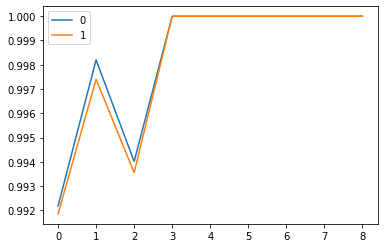

In [ ]:
# C값에 따른 train test 정확도 비교
pd.DataFrame(scores).plot()

# 모델 성능 평가
- 참고 : [익스5 캐글](https://github.com/LAGABI44/AIFFEL_Study/blob/LMS/EXPLORATION/Submission/%5BE-05%5DKaggle_House_Price_Prediction.ipynb)   
  => 해당 자료는 회귀 평가지표인 RMSE로 순위를 매긴 것인데, 분류 평가지표로 어떻게 바꿀 수 있을지 고민 좀 해봐야 할 듯...   
  => F1-score로 비교를 하는 것이 가장 좋을 듯!
- [성능지표에 대한 설명](https://bigdaheta.tistory.com/53?category=965501)
- 회귀와 분류의 모델 성능 평가 기준이 다름   
  => 회귀 : MSE, RMSE, MAE, MAPE 등(값이 작을 수록 해당 모델의 성능이 좋다는 것을 의미   
  => 분류 : 정확도, 정밀도, 재현율, F1-score

### F1-score
- 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 높은 값을 가짐


```
F1-score=2*Precision*Recall/(Precision+Recall)
```
- 정확도, 정밀도, 재현율, F1-score은 모두 0~1 사이의 값을 가지며, 1에 가까워질수록 성능이 좋다는 것을 의미


##RMSE 계산
- 회귀 모형만 가능하고 분류 모델은 해당 방법으로 찾는게 아닐텐데,,, 일단 적용시켜 봄

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# print('yea~')

# def rmse(ytest, y_pred):
#     return np.sqrt(mean_squared_error(np.expm1(ytest), np.expm1(y_pred)))

# print('드디어')

# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
# from sklearn.ensemble import RandomForestRegressor, VotingRegressor, AdaBoostRegressor

# print('고지가')

# # random_state는 모델초기화나 데이터셋 구성에 사용되는 랜덤 시드값입니다. 
# #random_state=None    # 이게 초기값입니다. 아무것도 지정하지 않고 None을 넘겨주면 모델 내부에서 임의로 선택합니다.  
# random_state=2022        # 하지만 우리는 이렇게 고정값을 세팅해 두겠습니다. 

# gboost = GradientBoostingRegressor(random_state=random_state)
# xgboost = XGBRegressor(random_state=random_state)
# lightgbm = LGBMRegressor(random_state=random_state)
# rdforest = RandomForestRegressor(random_state=random_state)
# ada = AdaBoostRegressor(random_state=random_state)

# models = [gboost, xgboost, lightgbm, rdforest, ada]

# print('눈 앞이야 엉엉😭')

yea~
드디어
고지가
눈 앞이야 엉엉😭


In [ ]:
def get_scores(models, train, y):
    # 답안 작성
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
#        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(xtrain, ytrain)
        y_pred = model.predict(xtest)
        
        df[model_name] = rmse(ytest, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=True)
            
    return score_df

get_scores(models, train, yt)

[03:40:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,RMSE
RandomForestRegressor,0.000000
AdaBoostRegressor,0.000000
XGBRegressor,0.000020
GradientBoostingRegressor,0.000026
LGBMRegressor,0.000026


## F1-score 
- [F1-score](https://www.statology.org/f1-score-in-python/)
- [헐 드디어 오차행렬 구하는 코드 찾음ㅠ](https://kimdingko-world.tistory.com/174)
- 5가지 모델
- [랜덤포레스트 구현](https://alex-blog.tistory.com/entry/Machine-Learning-Random-Forest-%EB%9E%9C%EB%8D%A4-%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8-%EC%98%88%EC%8B%9C-feat-python)
- [np.sqrt](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   성별          100000 non-null  int64  
 1   나이          100000 non-null  int64  
 2   bmi         100000 non-null  float64
 3   비만여부        100000 non-null  int64  
 4   혈색소         100000 non-null  float64
 5   빈혈여부        100000 non-null  int64  
 6   식전혈당(공복혈당)  100000 non-null  float64
 7   당뇨여부        100000 non-null  int64  
 8   (혈청지오티)AST  100000 non-null  float64
 9   AST구분       100000 non-null  int64  
 10  (혈청지오티)ALT  100000 non-null  float64
 11  ALT구분       100000 non-null  int64  
 12  AST/ALT비율   100000 non-null  float64
 13  감마 지티피      100000 non-null  float64
 14  GTP/ALT비율   100000 non-null  float64
 15  음주여부        100000 non-null  float64
 16  간 수치        100000 non-null  int64  
dtypes: float64(9), int64(8)
memory usage: 13.7 MB


In [22]:
# 오차행렬, 정확도, 정밀도, 재현율을 한번에 출력하기 위한 함수 정의

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(ytest, pred):
    confusion = confusion_matrix(ytest, y_pred)
    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    print('Confusion Matrix')
    print(confusion)
    print('정확도:{}, 정밀도:{}, 재현율:{}'.format(accuracy, precision, recall))

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


def get_clf_eval(ytest, y_pred):
    confusion = confusion_matrix(ytest, y_pred)
    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    return np.sqrt(mean_squared_error(np.expm1(ytest), np.expm1(y_pred)))

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
#from sklearn import metrics, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


random_state=2022 

logistic = LogisticRegression(random_state=random_state)
svm = LinearSVC(random_state=random_state)
forest = RandomForestClassifier(random_state=random_state) #n_estimators=100
knn = KNeighborsClassifier()  #n_neighbors = 3


models = [logistic, svm, forest, knn]

print('OK 완료!')

OK 완료!


In [ ]:
#<<<<<<응용!!!!!!!!!>>>>>>>

def get_scores(models, train, y):
    # 답안 작성
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
#        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(xtrain, ytrain)
        y_pred = model.predict(xtest)
        
        df[model_name] = get_clf_eval(ytest, y_pred)
        score_df = pd.DataFrame(df, index=['f1-score']).T.sort_values('f1-score', ascending=True)
            
    return score_df

get_scores(models, train, yt)

,f1-score
RandomForestClassifier,0.000000
LinearSVC,0.060750
LogisticRegression,0.197789
KNeighborsClassifier,0.270322


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


def get_clf_eval(ytest, y_pred):
    confusion = confusion_matrix(ytest, y_pred)
    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    return np.sqrt(mean_squared_error(np.expm1(ytest), np.expm1(y_pred)))

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
#from sklearn import metrics, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


random_state=2022 

logistic = LogisticRegression()
svm = LinearSVC(C=4)
forest = RandomForestClassifier(n_estimators=10) #n_estimators=100
knn = KNeighborsClassifier(n_neighbors = 3)  #n_neighbors = 3


models = [logistic, svm, forest, knn]

print('OK 완료!')

OK 완료!


In [25]:
#<<<<<<응용!!!!!!!!!>>>>>>>

def get_scores(models, train, y):
    # 답안 작성
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        xtrain,xtest,ytrain,ytest=train_test_split(xt, yt, test_size=0.2, random_state=42)
        model.fit(xtrain, ytrain)
        y_pred = model.predict(xtest)
        
        df[model_name] = get_clf_eval(ytest, y_pred)
        score_df = pd.DataFrame(df, index=['f1-score']).T.sort_values('f1-score', ascending=True)
            
    return score_df

get_scores(models, train, yt)

,f1-score
LinearSVC,0.000000
RandomForestClassifier,0.000000
LogisticRegression,0.197789
KNeighborsClassifier,0.274656


In [ ]:
# 로지스틱 회귀 알고리즘을 이용한 생존자 이진 분류 모델
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

lr_clf.fit(xtrain, ytrain)
pred = lr_clf.predict(xtest)

get_clf_eval(ytest, pred)

Confusion Matrix
[[16113     0]
 [  265  3622]]
정확도:0.98675, 정밀도:1.0, 재현율:0.9318240288139954


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(ytest, pred)
print('f1 score :', f1)

f1 score : 0.9647090158476495


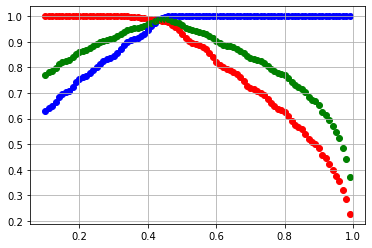

In [ ]:
from sklearn.preprocessing import Binarizer
import matplotlib.pyplot as plt

thresholds = list(np.arange(0.1, 1, 0.01))
pred_proba = lr_clf.predict_proba(xtest)

def get_eval_by_threshold(ytest, pred_proba, thresholds):
    for i in thresholds:
        binarizer = Binarizer(threshold = i).fit(pred_proba)
        pred = binarizer.transform(pred_proba)
        
        plt.scatter(i, precision_score(ytest, pred), color='b')
        plt.scatter(i, recall_score(ytest, pred), color='r')
        plt.scatter(i, f1_score(ytest, pred), color='g')

get_eval_by_threshold(ytest, pred_proba[:,-1].reshape(-1, 1), thresholds)

plt.grid()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

#define array of actual classes
actual = np.repeat([1, 0], repeats=[160, 240])

#define array of predicted classes
pred = np.repeat([1, 0, 1, 0], repeats=[120, 40, 70, 170])

#calculate F1 score
f1_score(actual, pred)

,count,mean,std,min,25%,50%,75%,max
성별,100000.0,0.488210,0.499863,0.000000,0.000000,0.000000,1.000000,1.000000
나이,100000.0,52.277600,10.785439,40.000000,40.000000,50.000000,60.000000,80.000000
bmi,100000.0,24.233258,3.522868,13.100000,22.000000,23.900000,26.200000,48.900000
비만여부,100000.0,0.600630,0.489771,0.000000,0.000000,1.000000,1.000000,1.000000
혈색소,100000.0,14.212699,1.555542,4.100000,13.200000,14.200000,15.300000,25.000000
빈혈여부,100000.0,0.195140,0.396310,0.000000,0.000000,0.000000,0.000000,1.000000
식전혈당(공복혈당),100000.0,104.159110,25.169287,25.000000,91.000000,99.000000,109.000000,701.000000
당뇨여부,100000.0,0.478370,0.499534,0.000000,0.000000,0.000000,1.000000,1.000000
(혈청지오티)AST,100000.0,27.626787,22.643837,2.000000,20.000000,24.000000,30.000000,2993.000000
AST구분,100000.0,0.091490,0.288306,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## 모델 훈련

In [ ]:
svm_model = svm.SVC(kernel='linear', C=4)
 
svm_model.fit(xtrain, ytrain) # SVM 분류 모델 훈련

SVC(C=4, kernel='linear')

In [ ]:
y_pred = svm_model.predict(xtest) # 테스트

In [ ]:
score = metrics.accuracy_score(y_pred,ytest)
report = metrics.classification_report(y_pred,ytest)

print(score)
print(report)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16113
           1       1.00      1.00      1.00      3887

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [ ]:
print("예측된 라벨:", y_pred)
print("ground-truth 라벨:", ytest)

예측된 라벨: ['0' '0' '1' ... '1' '0' '0']
ground-truth 라벨: ['0' '0' '1' ... '1' '0' '0']


# Overfitting 확인
- 성능 평가 다양하게 진행 : [참고](https://datascience.stackexchange.com/questions/26640/how-to-check-for-overfitting-with-svm-and-iris-data)
- [SVM 과접합에 대하여](https://stats.stackexchange.com/questions/35276/svm-overfitting-curse-of-dimensionality)

### (1) raw accuracy

In [ ]:
accuracy_score(y_pred, ytest)

1.0

### (2) cross_val_score
- Using the cross_val_score function, and printing the mean score and 95% confidence interval of the score estimate:

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_model, xt, yt, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.99 (+/- 0.00)


=> 교차 검증을 진행할 경우 raw accuracy보다 낮은 정확도를 보여줌   
=> overfitting 검사를 위해 KFold 검사 추천

### (3) KFold 유효성 검사
- [KFold에 대하여](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

In [ ]:
print("prediction accuracy: {:.2f}".format(np.mean(y_pred == ytest))) # 예측 정확도

prediction accuracy: 1.00


In [ ]:
# from sklearn.model_selection import KFold
# import numpy as np
# acc_score = []

# kf = KFold(n_splits=5)

# # for train_index, test_index in kf.split(x):

# #     xtrain, Xtest = x[train_index], X[test_index]
# #     ytrain, ytest = y[train_index], y[test_index]

# #     svm_model.fit(Xtrain,ytrain)
# #     predictions = svm_model.predict(xtest)
# #     acc_score.append(accuracy_score(predictions, ytest))

# accuracy_score(y_pred, ytest)
# acc_score.append(accuracy_score(y_pred, ytest))

# np.mean(acc_score)

1.0

## svm 시각화...
- [참고자료](https://ko.ilusionity.com/638-svm-machine-learning-tutorial-what-is-the-support-vector-machine-algorithm-explained-with-code-examples)

No handles with labels found to put in legend.


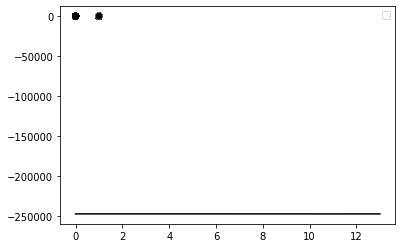

In [ ]:
# # 실패

# w = svm_model.coef_[0]    # get the weight values for the linear equation from the trained SVM model
# a = -w[0] / w[1]    # get the y-offset for the linear equation 
# XX = np.linspace(0, 13)    # make the x-axis space for the data points XX
# yy = a * XX - svm_model.intercept_[0] / w[1]    # get the y-values to plot the decision boundary y 


# plt.plot(XX, yy, 'k-')    # plot the decision boundary  
# plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ytrain)
# plt.legend()
# plt.show()    # show the plot visually 

- [방법2](https://data-gardner.tistory.com/31)

In [ ]:
# !pip install mglearn

     |████████████████████████████████| 540 kB 5.9 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=2a9a0960c4a3f3575ecc4dd449d4764b30119b9b41631ded164a6d2af87a14d6
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
import mglearn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


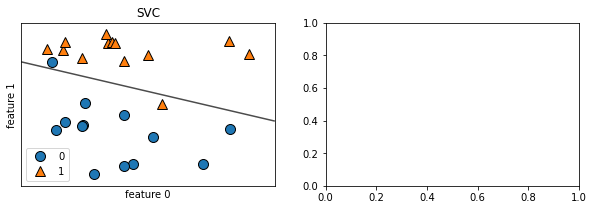

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC 
xtrain, ytrain = mglearn.datasets.make_forge() 
fig, axes = plt.subplots(1, 2, figsize=(10, 3)) 

for model, ax in zip([LinearSVC()], axes): 
  svm_model.fit(xtrain, ytrain)
  mglearn.plots.plot_2d_separator(svm_model, xtrain, fill=False, eps=0.5, ax=ax, alpha=.7) 
  mglearn.discrete_scatter(xtrain[:, 0], xtrain[:, 1], ytrain, ax=ax) 
  ax.set_title("{}".format(svm_model.__class__.__name__)) 
  ax.set_xlabel("feature 0") 
  ax.set_ylabel("feature 1") 
  
axes[0].legend()

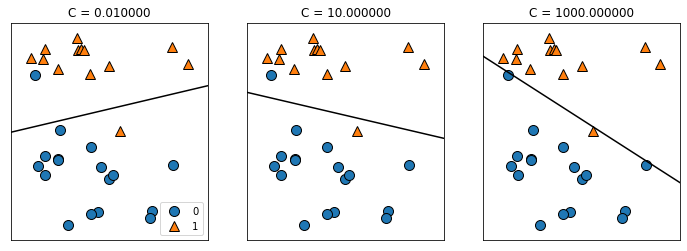

In [ ]:
mglearn.plots.plot_linear_svc_regularization()

- [방법(3)](https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-7-%EC%BB%A4%EB%84%90-%EC%84%9C%ED%8F%AC%ED%8A%B8-%EB%B2%A1%ED%84%B0-%EB%A8%B8%EC%8B%A0/)

Text(0, 0.5, 'feature 1')

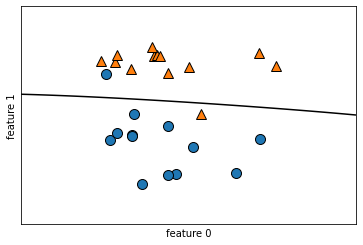

In [ ]:
from sklearn.svm import LinearSVC
linear_svm = svm_model.fit(xtrain, ytrain)

mglearn.plots.plot_2d_separator(linear_svm, xtrain)
mglearn.discrete_scatter(xtrain[:, 0], xtrain[:, 1], ytrain)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

- 기타 시각화 : [참고](https://jfun.tistory.com/115)   
=> 균등 비율, 정규분포, c값에 따른 그래프, fit() 결과 등고선

# 결과 정리
|No.|데이터 수|변동 사항|accuracy|0_precision|0_recall|1_precision|1_recall|
|---|---|---|---|---|---|---|---|
|---|---|---|---|---|---|---|---|

# Error
(1) NameError: name 'mglearn' is not defined   
=> !pip install mglearn [참고](https://m.blog.naver.com/lcj8390/221980377436)   
=> import 해줘야 함⭐

#Reference

1. https://bskyvision.com/851   
2. svm에 대한 자세한 설명 : https://bskyvision.com/163
